# G3D Fitting

In [1]:
import fitPRd
from analysis import aesthetic_plot, iso_in_plots
import matplotlib.pyplot as plt
import numpy as np

## Test no-histogram method

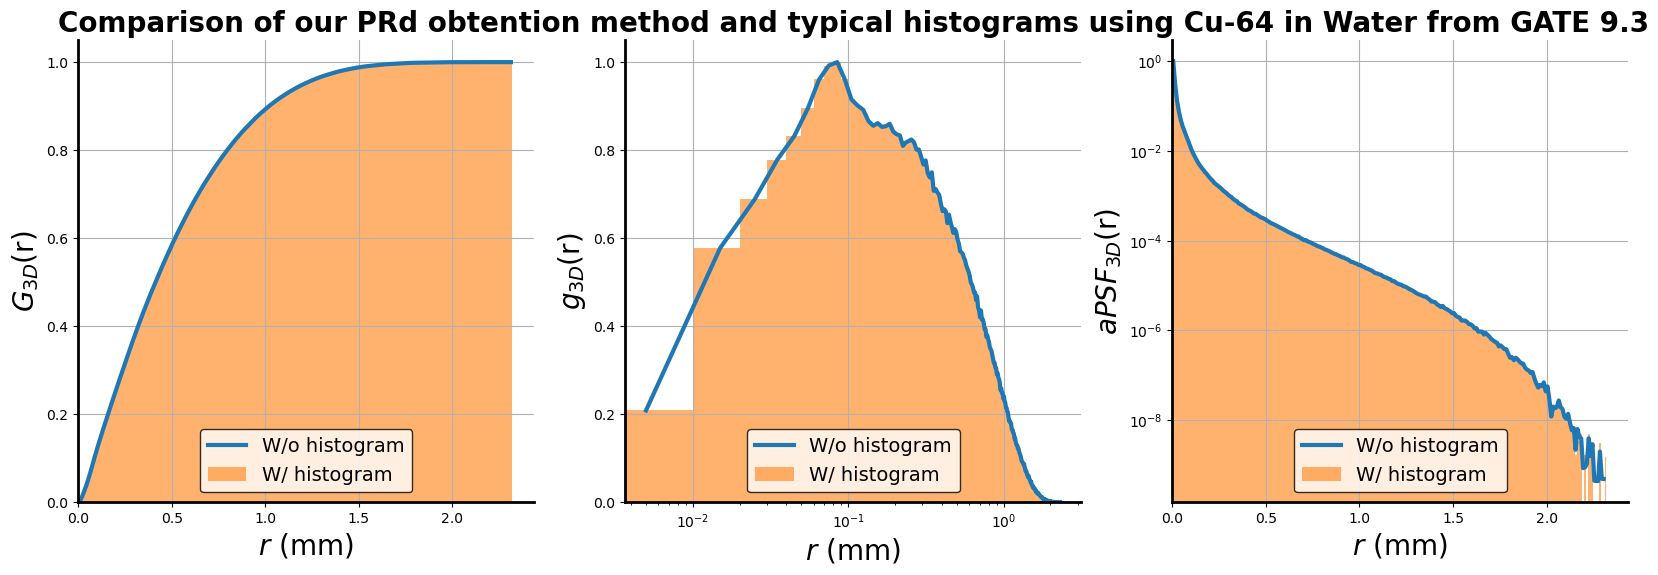

In [21]:
material = "Water"
code, coden = "GATE93", "GATE 9.3"
isotope = "Cu64"
input_file = f"RESULTS/SPC/{material}/{code}_xyz/{isotope}.dat" # in cm

# using histograms
bs = 1e-3      # <<---<< the lower the better (in cm)
hr, h_g3D = fitPRd.load_histo_g3D(input_file, bs)
hr, h_aPSF3D = fitPRd.load_histo_aPSF3D(input_file, bs)
hr, h_G3D = fitPRd.load_histo_G3D(input_file, bs)

# without histograms
nhr, nh_G3D = fitPRd.load_nonhisto_G3D(input_file)
nhrp, nh_g3D = fitPRd.load_nonhisto_g3D(input_file, bs)
nhrp, nh_aPSF3D = fitPRd.load_nonhisto_aPSF3D(input_file, bs)

step = np.arange(0, nhr[-1] + bs, bs)
# Plots
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(nhr*10, nh_G3D, label='W/o histogram')
plt.stairs(h_G3D, step*10, label='W/ histogram', fill=True, alpha=0.6)
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$G_{3D}$(r)')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
leg.set_loc('lower center')


plt.subplot(1,3,2)
plt.plot(nhrp*10, nh_g3D, label='W/o histogram')
plt.stairs(h_g3D, step*10, label='W/ histogram', fill=True, alpha=0.6)
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$g_{3D}$(r)')
plt.xscale('log')
plt.title(f'{iso_in_plots(isotope)} in {material} using {coden}')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
ax.set_title(f'Comparison of our PRd obtention method and typical histograms using {iso_in_plots(isotope)} in {material} from {coden}', fontsize=20, weight='bold')
leg.set_loc('lower center')

plt.subplot(1,3,3)
plt.plot(nhrp*10, nh_aPSF3D, label='W/o histogram')
plt.stairs(h_aPSF3D, step*10, label='W/ histogram', fill=True, alpha=0.6)
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$aPSF_{3D}$(r)')
plt.yscale('log')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
leg.set_loc('lower center')


plt.show()

## Test fitting method using lmfit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters

# Define the model function
def model_func(x, a1, b1, c1, n1, a2, b2, c2, n2, a3, b3, c3, n3):
    f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
    f2 = (a2*x)**n2 + (b2*x)**2.5 + (c2*x)**3.5
    f3 = (a3*x)**n3 + (b3*x)**2.5 + (c3*x)**3.5
    return 1 - 1.30e-2*np.exp(-f1) - 51.93e-2*np.exp(-f2) - 46.89e-2*np.exp(-f3)

# Create a Model instance
mod = Model(model_func)

# Create parameters with initial guesses and bounds
params = Parameters()
params.add('a1', value=1.0, min=0, max=None)
params.add('b1', value=1.0, min=0, max=None)
params.add('c1', value=1.0, min=0, max=None)
params.add('n1', value=1.0, min=1, max=2)
params.add('a2', value=1.0, min=0, max=None)
params.add('b2', value=1.0, min=0, max=None)
params.add('c2', value=1.0, min=0, max=None)
params.add('n2', value=1.0, min=1, max=2)
params.add('a3', value=1.0, min=0, max=None)
params.add('b3', value=1.0, min=0, max=None)
params.add('c3', value=1.0, min=0, max=None)
params.add('n3', value=1.0, min=1, max=2)

# Get data
material = "Water"
cfolder = "PenEasy2024_xyz"
ffolder = "SPC" # SPC for Coulomb effect, noCoulomb for no Coulomb effect
isotope = "I124"

# Load sample
input_file = f"RESULTS/{ffolder}/{material}/{cfolder}/{isotope}.dat" # in cm
sample_r, sample_G3D = fitPRd.load_nonhisto_G3D(input_file)
sample_r *= 10

# Assume xdata and ydata are defined as before.
result = mod.fit(sample_G3D, params, x=sample_r)
print(result.fit_report())

# Plot the result
plt.figure()
plt.plot(sample_r, sample_G3D, 'k--', label='Data')
plt.plot(sample_r, result.best_fit, 'r-', label='lmfit')
plt.xlabel('x')
plt.ylabel('Cumulative probability')
plt.xscale('log')
plt.legend()
plt.show()


# Apply G3DF to all results

### single-branch isotopes

1 - 1.0*exp(-(a1*x)**n1 - (b1*x)**2.5 - (c1*x)**3.5)
**********-PHITS_xyz-**********
Water - C11         	n1=1.0791	rmse=1.0e-03	chi2=9.4e+00 (0.32%)	final_params={a1: 0.827, b1: 0.493, c1: 0.002, n1: 1.001}
Water - N13         	n1=1.0656	rmse=9.1e-04	chi2=6.6e+00 (0.26%)	final_params={a1: 0.559, b1: 0.379, c1: 0.097, n1: 1.029}
Water - O15         	n1=1.0557	rmse=9.3e-04	chi2=1.1e+01 (0.34%)	final_params={a1: 0.312, b1: 0.233, c1: 0.121, n1: 1.106}
Water - F18         	n1=1.0000	rmse=6.8e-04	chi2=2.3e+00 (0.16%)	final_params={a1: 1.718, b1: 0.718, c1: 0.563, n1: 1.001}
Water - Cu64        	n1=1.3481	rmse=5.0e-04	chi2=2.8e+00 (0.17%)	final_params={a1: 1.577, b1: 0.0, c1: 0.659, n1: 1.234}
Lung - C11          	n1=1.0791	rmse=9.6e-04	chi2=1.6e+01 (0.40%)	final_params={a1: 0.247, b1: 0.141, c1: 0.076, n1: 1.001}
Lung - F18          	n1=1.0000	rmse=7.4e-04	chi2=5.3e+00 (0.23%)	final_params={a1: 0.51, b1: 0.211, c1: 0.17, n1: 1.001}
Bone - C11          	n1=1.0791	rmse=7.3e-04	chi2=3.8e+00 (

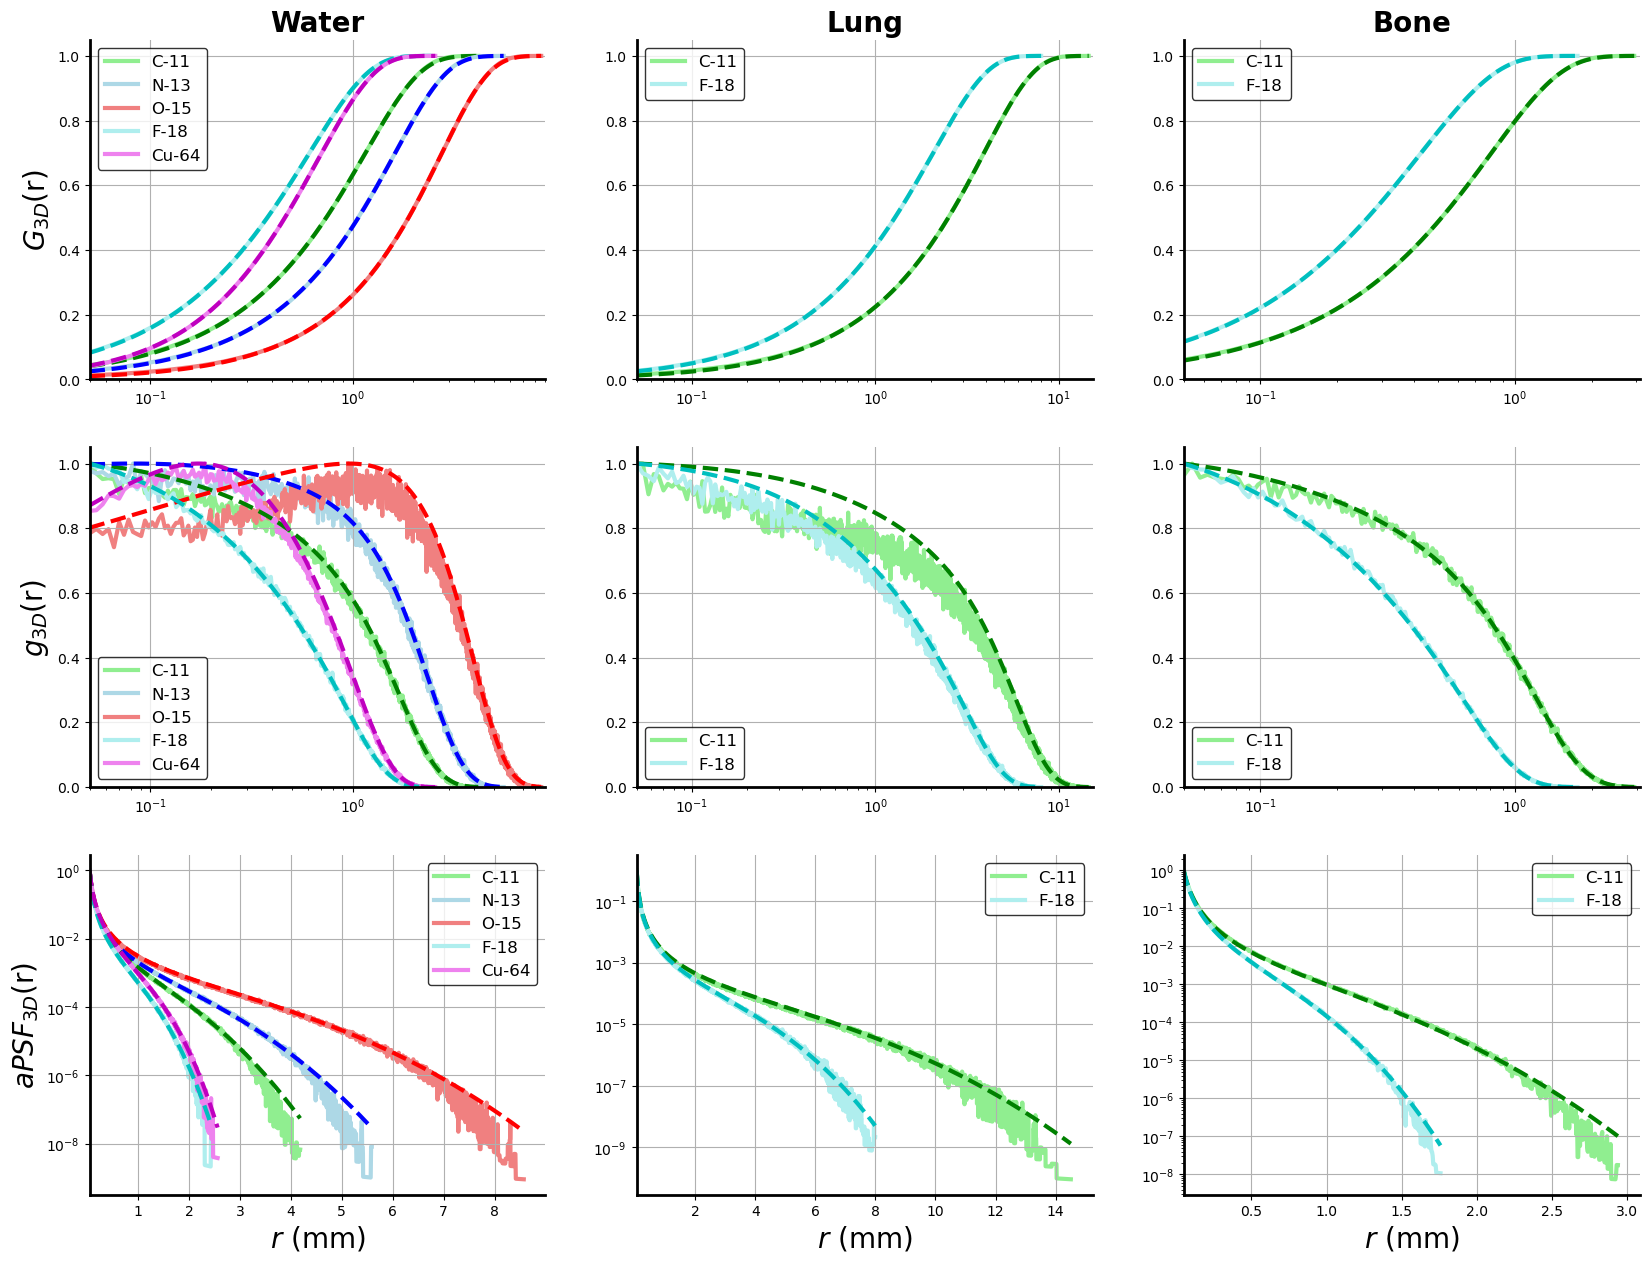

In [4]:
colors1 = ['g', 'b', 'r', 'c', 'm']
colors2 = ['lightgreen', 'lightblue', 'lightcoral', 'paleturquoise', 'violet']
colors = list(zip(colors1, colors2))
cfolders = {
    "PHITS_xyz":"PHITS",
    # "PenEasy2020_xyz":"SPC",
    # "PenEasy2024_xyz":"SPC",
    # "PeneloPET2020_xyz":"2020",
    # "PeneloPET2024_xyz":"2024",
    # "GATE92_xyz":"9",
    # "GATE93_xyz":"9",
    # "GATE7_xyz":"7",
}
clabels = {
    "PHITS_xyz":"PHITS 3.3",
    "PenEasy2020_xyz":"PenEasy 2020",
    "PenEasy2024_xyz":"PenEasy 2024",
    "PeneloPET2024_xyz":"PeneloPET 2024",
    "GATE92_xyz":"GATE 9.2",
    "GATE93_xyz":"GATE 9.3",
    "GATE7_xyz":"GATE 7.0",
}
ffolder = "SPC" # SPC for Coulomb effect, noCoulomb for no Coulomb effect
materials = ["Water", "Lung", "Bone"]       #, "Lung", "Bone"]
isotopes = ["C11", "N13", "O15", "F18", "Cu64"]
iso_colors = dict(zip(isotopes, colors))
bs = 4e-4      #cm
rm = 5e-2      #mm 5e-2

# Defining fitting function
preffix="n_is_param"
save_fits = False
fit_func, argsP, argsC = fitPRd.MBfit_function(100)

print(fit_func.name)
for cfolder, pid in cfolders.items():
    print(f"**********-{cfolder}-**********")
    plt.figure(figsize=(20,15))
    for k,mat in enumerate(materials,1):
        save_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{pid}-sb_fit-{preffix}.txt"
        save_txt = f"# Fitting function: {fit_func.name}\n"
        save_txt += "# Constants: " + (f"{fit_func.consts}" if fit_func.consts else "None") + "\n"
        save_txt += f"# {'Isotope':<8} {'residue':<10} {'rmse':<10} {'chi2':<10} " + ' '.join([f"{str(p):<6}" for p in argsP]) +  ' '.join([f"{str(c):<6}" for c in argsC]) + "\n"

        for iso in isotopes:
            if mat in ["Lung", "Bone"] and iso not in ["C11", "F18", "Ga68"]: continue
            if cfolder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]: continue
            if cfolder == "PeneloPET2020_xyz" and (iso in ["Cu64"] or mat in ["Lung", "Bone"]): continue
            
            # Load sample
            input_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{iso}.dat" # in cm
            sample_r, sample_G3D = fitPRd.load_nonhisto_G3D(input_file)
            sample_rp, sample_g3D = fitPRd.load_nonhisto_g3D(input_file, tol=bs)
            sample_rp, sample_aPSF3D = fitPRd.load_nonhisto_aPSF3D(input_file, tol=bs)
            sample_r *= 10
            sample_rp *= 10
            trimed_rp = sample_rp[sample_rp > rm]

            # Substitute constants
            ce = fitPRd.coulomb_effect(iso)    # Coulomb effect
            cvals = list(ce)
            fit_func.consts = {C:V for C,V in zip(argsC, cvals)}

            # Iterate initial parameters for best fitting 
            min_res = (1e10, fit_func.init_params) 
            for i0 in np.linspace(0, 1.6, 3):
                fit_func.init_params = [i0,] * len(argsP)
                res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
                if res < min_res[0]:
                    min_res = (res, fit_func.fitted_params)
            fit_func.init_params = min_res[1]
            res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
            stderr = fit_func.stderr
            rmse = fit_func.rmse

            # Get final fitting expressions
            final_params = fit_func.get_params(redon=3, with_err=False)
            print(f"{' - '.join([mat, iso]):<20}\tn1={ce[0]:<5.4f}\t{rmse=:.1e}\t{chi2=:.1e} ({stderr*100:.2f}%)\t{final_params=}")
            # fit_func.show_info(redon=4)
            fit_G3D = fit_func.get_G3D()
            fit_g3D = fit_func.get_g3D()
            fit_aPSF3D = fit_func.get_aPSF3D()

            # Plot
            fc, dc = iso_colors[iso]
            isop = iso_in_plots(iso)

            plt.subplot(3,3,k)
            plt.plot(sample_r, sample_G3D, '-', label=f'{isop}', color=dc)
            plt.plot(sample_r, fit_G3D(sample_r), '--', label='', color=fc)

            plt.subplot(3,3,k+len(materials))
            plt.plot(trimed_rp, sample_g3D[sample_rp > rm]/sample_g3D[sample_rp > rm].max(), '-', label=f'{isop}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_g3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            plt.subplot(3,3,k+2*len(materials))
            plt.plot(trimed_rp, sample_aPSF3D[sample_rp > rm]/sample_aPSF3D[sample_rp > rm].max(), '-', label=f'{isop}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_aPSF3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            # Save fit parameters
            save_txt += f"{iso:<9}  {res:<10.3f} {rmse:<10.2e} {chi2:<10.3f} " + \
                        ' '.join([f"{p:<6.3f}" for p in final_params.values()]) + \
                        ' '.join([f"{c:<6.3f}" for c in fit_func.consts.values()]) + "\n"

        plt.subplot(3,3,k)
        # plt.plot([], [], 'k--', label='Fits')
        plt.title(f'{mat}')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$G_{3D}$(r)')
        plt.xlim(rm, None)
        plt.xscale('log')
        ax, leg = aesthetic_plot(legend_size=12, linewidth=3)
        leg.set_loc('upper left')
        
        plt.subplot(3,3,k+len(materials))
        # plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$g_{3D}$(r)')
        plt.xlim(rm, None)
        # plt.ylim(7e-1, 1)
        plt.xscale('log')
        ax, leg = aesthetic_plot(legend_size=12, linewidth=3, powered_yscale=True)
        leg.set_loc('lower left')

        plt.subplot(3,3,k+2*len(materials))
        # plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$aPSF_{3D}$(r)')
        plt.xlabel(r'$r$ (mm)')
        plt.yscale('log')
        plt.xlim(rm, None)
        ax, leg = aesthetic_plot(legend_size=12, linewidth=3)
        leg.set_loc('upper right')

        # Save fit parameters for given material and pid
        if save_fits:
            with open(save_file, 'w') as f:
                f.write(save_txt)
    plt.show()